# Abtastung zeitkontinuierlicher Signale

Wir schauen uns das Tiefpasssignal
\begin{equation*}
    x(t) = \frac{\omega_1}{\pi} \cdot A_1 \cdot \mathrm{si}(\omega_1 t)
         + \frac{\omega_2}{\pi} \cdot A_2 \cdot \mathrm{si}(\omega_2 t)
\end{equation*}

mit den Kreisfrequenzen $\omega_1 < \omega_2$ und dem Spektrum 

\begin{equation*}
    X(j \omega) = \begin{cases}
        A_2     & \text{für } \omega_1 \leq |\omega| \leq \omega_2 \\
        A_1+A_2 & \text{für } |\omega| \leq \omega_1 \\
        0   & \text{sonst}
        \end{cases}
\end{equation*}

an. Die folgende Abbildung zeigt Signal und Spektrum für $f_1=0.5$ Hz, $f_2=1$ Hz und $A_1=A_2=1$.


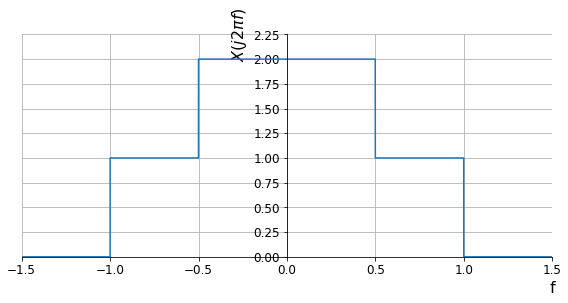

In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize']=(8,4)
rcParams['xtick.labelsize']=12
rcParams['ytick.labelsize']=12
rcParams['axes.grid']='True'
rcParams['axes.labelsize']='16'

t = var('t')
f = var('f')
f_1 = 0.5
f_2 = 1.0
A_1 = 1.0
A_2 = 1.0

X = A_2 * (Heaviside(f+f_2) - Heaviside(f-f_2)) + A_1 * (Heaviside(f+f_1) - Heaviside(f-f_1))

plot(X, (f, -1.5, 1.5), ylabel='$X(j 2 \pi f)$',axis_center=(0,0), xlim=(-1.5, 1.5), ylim=(0, 2.25))

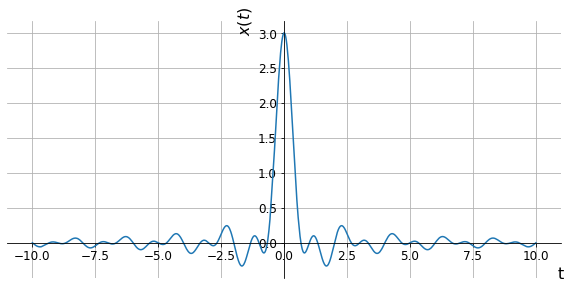

In [2]:
x = inverse_fourier_transform(X,f,t)
rcParams['figure.figsize']=(8,4)

plot(x, (t, -10, 10), ylabel='$x(t)$',axis_center=(0,0),grid=True);

Die Abtastung von $x(t)$ mit der Rate $f_{\mathrm{a}} = \frac{1}{T_{\mathrm{a}}}$ liefert die Abtastwerte

\begin{equation*}
    x[k] = x(kT_{\mathrm{a}}) 
    = x(t) \cdot \sum_k \delta(t-kT_{\mathrm{a}})
    = \frac{\omega_1}{\pi} \cdot A_1 \cdot \mathrm{si}(\omega_1 kT_{\mathrm{a}})
    + \frac{\omega_2}{\pi} \cdot A_2 \cdot \mathrm{si}(\omega_2 kT_{\mathrm{a}})
\end{equation*}

<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in true_divide
  return 0.5*1j*(exp(1.0*1j*pi*t) + exp(2.0*1j*pi*t) - exp(4.0*1j*pi*t) - exp(5.0*1j*pi*t))*exp(-3.0*1j*pi*t)/(pi*t)


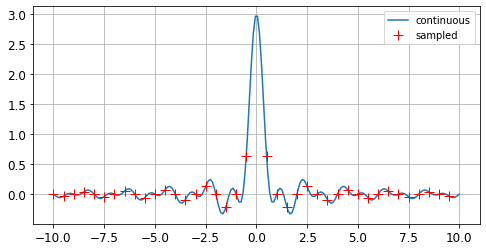

In [3]:
# Abtastrate in 1/Sekunde
f_a = 2.0
# Abtastintervall in Sekunden
T_a = 1/f_a

# Diskretisierung der zeitkontinuierlichen Funktion für matplotlib
t_s = np.linspace(-10,10,200)
x_function = lambdify((t,), x, modules='numpy')
x_s = np.real(x_function(t_s))

# Abtastzeitpunkte und Abtastwerte
t_a = np.arange(-10,10,T_a)
x_a = np.real(x_function(t_a))

fig_sampled = plt.figure(figsize=(8,4))
ax = fig_sampled.add_subplot(111)
ax.plot(t_s,x_s,label='continuous')
ax.plot(t_a,x_a,'r+',label='sampled',markersize=10)
plt.grid(True)
plt.legend(loc='upper right')

Da das abgetastete Signal als Produkt von kontinuierlichem Signal und einer Folge von Dirac-Impulsen interpretiert werden kann, ergibt sich das Spektrum aus der Faltung der zugehörigen Spektren. Es ist leicht zu zeigen, dass eine Folge von Dirac-Impulsen (zeitlicher Abstand $T_{\mathrm{a}}$) mit einer Folge von Dirac-Impulsen (Frequenzabstand $f_{\mathrm{a}}=T_{\mathrm{a}}^{-1}$ korrespondiert. Damit lautet das Spektrum des abgetasteten Signals

\begin{equation*}
    X_{\mathrm{a}}(e^{j \omega}) 
    = X(j \omega) \ast \sum_k \delta(\omega - k \omega_{\mathrm{a}})
    = \sum_k X(j \omega - j k \omega_{\mathrm{a}}) \; .
\end{equation*}

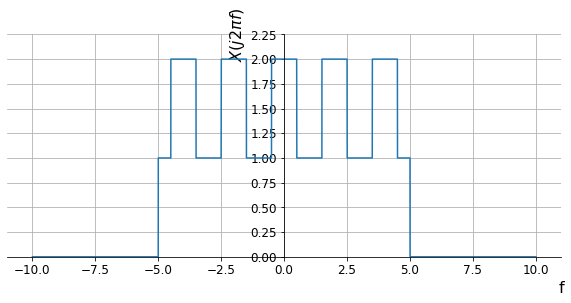

In [4]:
# shifted by f_a
f_11 = f_1-f_a
f_12 = f_1+f_a
f_21 = f_2-f_a
f_22 = f_2+f_a

# shifted by 2 f_a
f_13 = f_1-2*f_a
f_14 = f_1+2*f_a
f_23 = f_2-2*f_a
f_24 = f_2+2*f_a


X_sampled = A_2*Heaviside(f+f_2) - A_2*Heaviside(f-f_2) \
          + A_1*Heaviside(f+f_1) - A_1*Heaviside(f-f_1) \
          + A_2*(Heaviside(f+f_21) - Heaviside(f-f_22) + Heaviside(f+f_22) - Heaviside(f-f_21)) \
          + A_1*(Heaviside(f+f_11) - Heaviside(f-f_12) + Heaviside(f+f_12) - Heaviside(f-f_11)) \
          + A_2*(Heaviside(f+f_23) - Heaviside(f-f_24) + Heaviside(f+f_24) - Heaviside(f-f_23)) \
          + A_1*(Heaviside(f+f_13) - Heaviside(f-f_14) + Heaviside(f+f_14) - Heaviside(f-f_13))


plot(X_sampled, (f, -10, 10), ylabel='$X(j 2 \pi f)$',axis_center=(0,0), ylim=(0, 2.25))